In [1]:
from learning_center import *
from matplotlib import pyplot as plt

In [8]:
#runData = specify runData directory, CFD-Data is available on request.


In [3]:
l = learning_center(runData = runData, cluster_anzahl = 16)

First Object: Retrain first:
*** Start Retrain ***
Time taken for sorting and loading File-List: 4.634829044342041 seconds
Time taken for loading: 1.513634204864502 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.11985111236572266 seconds
Time taken for loading: 1.4416444301605225 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.11942291259765625 seconds
Time taken for loading: 1.194951057434082 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.11970949172973633 seconds
Time taken for loading: 1.2309060096740723 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.11911201477050781 seconds
Time taken for loading: 1.2445173263549805 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.1196584701538086 seconds
Time taken for loading: 1.1860630512237549 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.125053644180

#### Recommendation and Prediction based on DOFs: ####

In [4]:
case_id = 107
x = l.case_data[1][case_id - 1 ]
print(f"DOFs for Case-Id {case_id}.")
print("Recommendation for DOFs:")
recommend = l.recommend_sim([x])

DOFs for Case-Id 107.
Recommendation for DOFs:
EVAL CONTER = 1
Gaussian Process with dim = 1.
Recommend Sim: True. Known Cluster_ID: True. Gaussian Estimation: True.
Predicted Fitness: [0.06513115 0.00154888 0.02414626]


#### Plot Pressure Field of Cluster-ID: ####

In [5]:
### you must reload Tensors befor plotting is possible ###
l.load_tensors()

Time taken for sorting and loading File-List: 3.952195167541504 seconds
Time taken for loading: 0.2905550003051758 seconds
Loaded Tensors from  b1
Time taken for sorting and loading File-List: 0.5385944843292236 seconds
Time taken for loading: 0.6464591026306152 seconds
Loaded Tensors from  b2
Time taken for sorting and loading File-List: 0.1264493465423584 seconds
Time taken for loading: 1.1896553039550781 seconds
Loaded Tensors from  b3
Time taken for sorting and loading File-List: 0.11877584457397461 seconds
Time taken for loading: 1.16694974899292 seconds
Loaded Tensors from  b4
Time taken for sorting and loading File-List: 0.11874151229858398 seconds
Time taken for loading: 1.1729495525360107 seconds
Loaded Tensors from  b5
Time taken for sorting and loading File-List: 0.11854362487792969 seconds
Time taken for loading: 1.119518518447876 seconds
Loaded Tensors from  b6
Time taken for sorting and loading File-List: 0.12051177024841309 seconds
Time taken for loading: 1.1656384468078

In [6]:
cluster_id = l.cluster_ids_valued[0][2]
cluster_id

array([13,  4,  3, 10,  4,  9,  8, 13], dtype=int32)

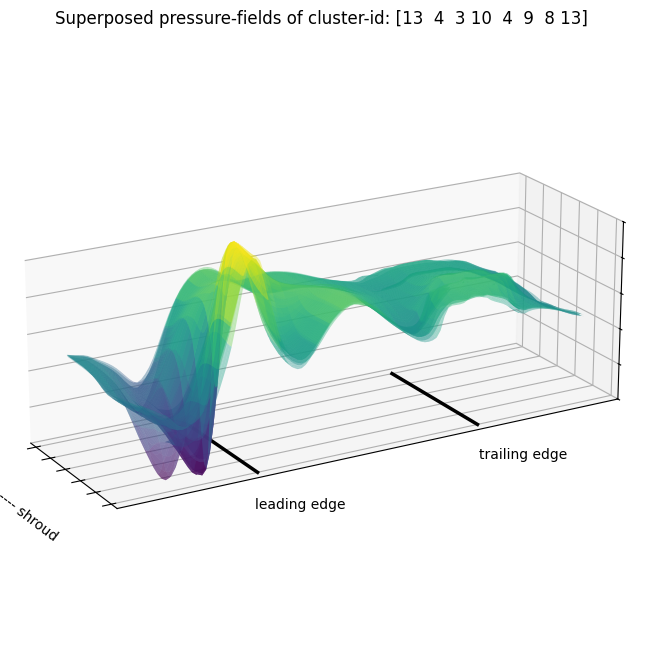

In [7]:
l.plot_tensor_all(cluster_id)